<a href="https://colab.research.google.com/github/PuchToTalk/Ladybug_project/blob/spot-counting/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

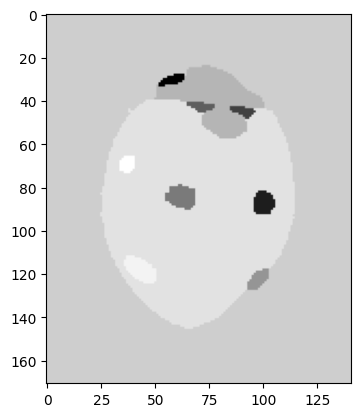

In [ ]:
# Importer la bibliothèque PIL et Matplotlib
from PIL import Image
import matplotlib.pyplot as plt

# Ouvrir l'image 'im-002_seg.png' avec la bibliothèque PIL et la convertir en niveaux de gris
image = Image.open('/content/im-001_seg.png').convert("L")

# Afficher l'image à l'aide de Matplotlib avec un color mapping en niveaux de gris
plt.imshow(image,cmap="Greys")

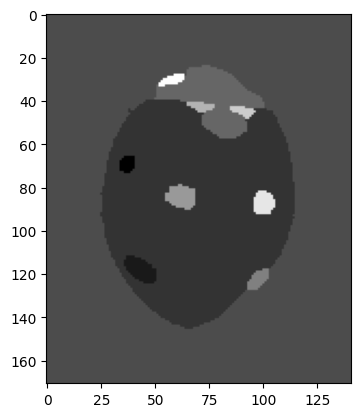

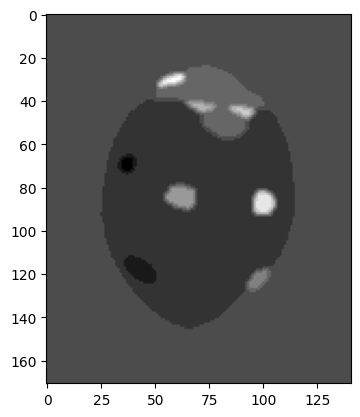

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Ouvrir l'image 'im-001_seg.png' avec la bibliothèque PIL et la convertir en niveaux de gris
image = Image.open('/content/im-001_seg.png').convert("L")

# Afficher l'image à l'aide de Matplotlib avec un color mapping en niveaux de gris
plt.imshow(image, cmap="gray")
plt.show()

# Converting the numpy image to PIL image
img_gamma = np.array(image)

# Converting PIL image to OpenCV image
img_cv = cv2.cvtColor(img_gamma, cv2.COLOR_GRAY2BGR)

# Converting the image to grayscale
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

blurred_img = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Afficher l'image seuillée
plt.imshow(blurred_img, cmap="gray")
plt.show()

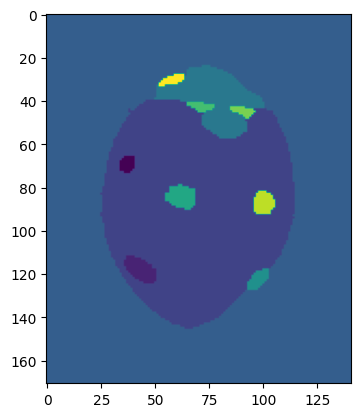

In [ ]:
import matplotlib.pyplot as plt

# Charger l'image 'im-001_seg.png'
image = plt.imread('im-001_seg.png')

# Créer une nouvelle figure
plt.figure()

# Afficher l'image
plt.imshow(image)

# Variables pour stocker les coordonnées des clics et les labels associés
points = []
labels = []

# Fonction de rappel pour gérer les clics de souris
def onclick(event):
    x = int(round(event.xdata))
    y = int(round(event.ydata))
    
    # Ajouter les coordonnées du clic et demander le label associé
    points.append((x, y))
    label = input(f"Label pour le point ({x}, {y}) : ")
    labels.append(label)
    
    # Afficher le label sur l'image
    plt.text(x, y, label, color='red', fontsize=12)
    plt.draw()

# Connecter la fonction de rappel aux clics de souris
plt.connect('button_press_event', onclick)

# Afficher l'image avec les labels
plt.show()

# Afficher les coordonnées des points et les labels associés
for i, point in enumerate(points):
    print(f"Point ({point[0]}, {point[1]}) - Label : {labels[i]}")

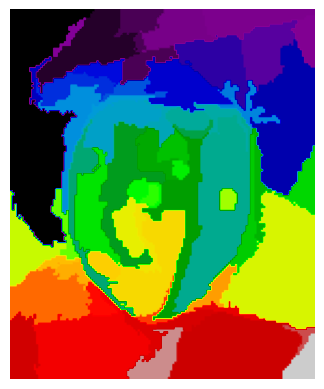

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, filters, segmentation, measure, feature

# Charger l'image
image = io.imread('im-001_im.png')

# Segmenter l'image en régions distinctes en utilisant la segmentation par croissance de région
regions = segmentation.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# Afficher l'image segmentée
plt.imshow(regions, cmap='nipy_spectral')
plt.axis('off')
plt.show()

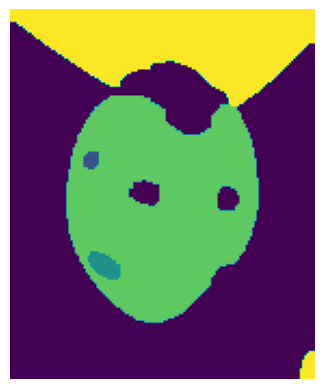

In [ ]:
import numpy as np
from skimage import io, filters, morphology
import matplotlib.pyplot as plt

# Charger l'image
image = io.imread('im-001_seg.png')

# Convertir l'image en niveaux de gris
image_gray = io.imread('im-001_seg.png', as_gray=True)

# Appliquer un seuillage adaptatif pour binariser l'image
thresh = filters.threshold_local(image_gray, block_size=101)
binary = image_gray > thresh

# Appliquer une opération de fermeture pour remplir les trous dans la région binaire
binary_closed = morphology.closing(binary, morphology.square(5))

# Créer un masque pour enlever la tête de la coccinelle
head_mask = np.copy(image_gray)
head_mask[binary_closed] = 0

# Appliquer un masque pour ne garder que la région de la carapace
carapace_region = np.copy(image)
carapace_region[head_mask == 0] = 0

# Afficher l'image de la carapace
plt.imshow(carapace_region)
plt.axis('off')
plt.show()

<ipython-input-28-6b400a9c69ac>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.zeros_like(image, dtype=np.int)


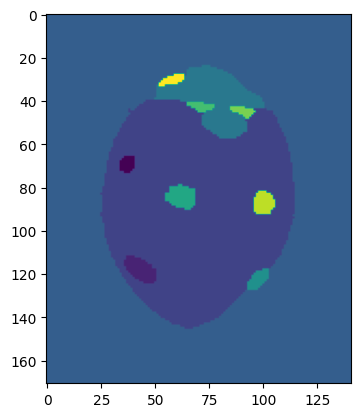

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Charger l'image 'im-001_seg.png'
image = plt.imread('im-001_seg.png')

# Créer une nouvelle figure
plt.figure()

# Afficher l'image
plt.imshow(image)

# Variables pour stocker les labels associés à chaque région
labels = np.zeros_like(image, dtype=np.int)

# Fonction de rappel pour gérer les clics de souris
def onclick(event):
    x = int(round(event.xdata))
    y = int(round(event.ydata))
    
    # Obtenir la couleur de la région cliquée
    color = image[y, x]
    
    # Vérifier si la région a déjà été segmentée
    if labels[y, x] == 0:
        # Trouver tous les pixels de la même couleur que la région cliquée
        indices = np.where(np.all(image == color, axis=-1))
        
        # Attribuer un label distinct à la région
        label = np.max(labels) + 1
        labels[indices] = label
        
        # Afficher le label sur l'image
        plt.text(x, y, str(label), color='red', fontsize=12)
        plt.draw()

# Connecter la fonction de rappel aux clics de souris
plt.connect('button_press_event', onclick)

# Afficher l'image avec les labels
plt.show()

# Afficher les labels associés à chaque région
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == 0:
        continue  # Ignorer le label pour le fond
    region_indices = np.where(labels == label)
    print(f"Label {label} - Nombre de pixels : {len(region_indices[0])}")

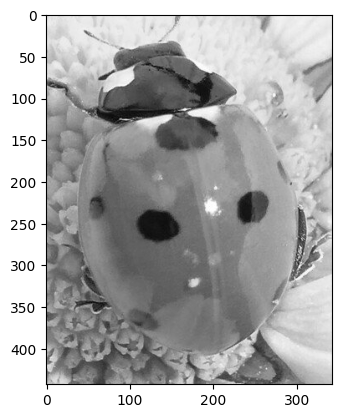

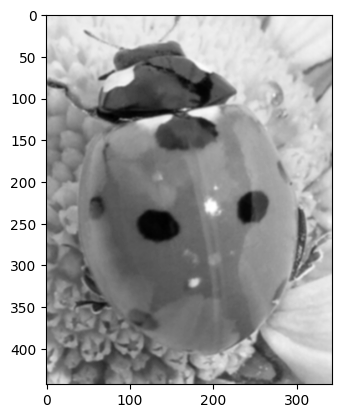

Nb points : 21


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Ouvrir l'image 'im-001_seg.png' avec la bibliothèque PIL et la convertir en niveaux de gris
image = Image.open('/content/im-002_im.png').convert("L")

# Afficher l'image à l'aide de Matplotlib avec un color mapping en niveaux de gris
plt.imshow(image, cmap="gray")
plt.show()

# Converting the numpy image to PIL image
img_gamma = np.array(image)

# Converting PIL image to OpenCV image
img_cv = cv2.cvtColor(img_gamma, cv2.COLOR_GRAY2BGR)

# Converting the image to grayscale
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Thresholding the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Blurring the grayscale image
blurred_img = cv2.GaussianBlur(gray, (5, 5), 0)

# Afficher l'image seuillée
plt.imshow(blurred_img, cmap="gray")
plt.show()

# Thresholding the blurred image
_, threshold = cv2.threshold(blurred_img, 150, 255, cv2.THRESH_BINARY)

# Finding contours in the thresholded image
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

nombre_de_points = 0
for contour in contours:
    if cv2.contourArea(contour) > 50:
        nombre_de_points += 1

print("Nb points :", nombre_de_points)

#cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

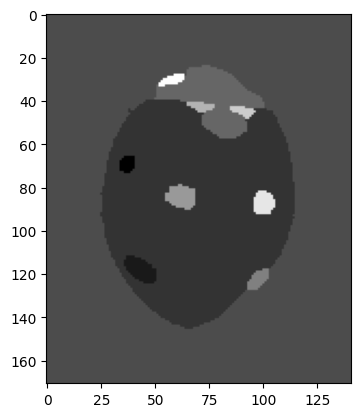

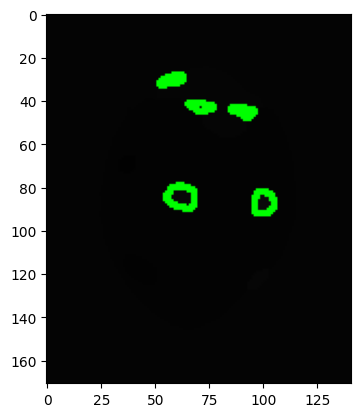

Nombre de contours:  5


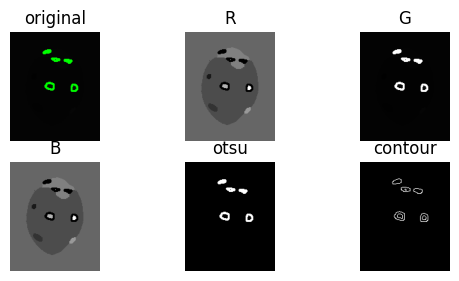

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Ouvrir l'image 'im-001_seg.png' avec la bibliothèque PIL et la convertir en niveaux de gris
image = Image.open('/content/im-001_seg.png').convert("L")

# Afficher l'image à l'aide de Matplotlib avec un color mapping en niveaux de gris
plt.imshow(image, cmap="gray")
plt.show()

# Converting the numpy image to PIL image
img_gamma = np.array(image)

# Converting PIL image to OpenCV image
img_cv = cv2.cvtColor(img_gamma, cv2.COLOR_GRAY2BGR)

# Converting the image to grayscale
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Thresholding the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(img_cv, contours, -1, (0, 255, 0), 2)

# Convert the image back to PIL image
result_image = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))

# Afficher l'image avec les contours
plt.imshow(result_image)
plt.show()

# Converting PIL image to OpenCV image
im_cv = cv2.cvtColor(np.array(result_image), cv2.COLOR_RGB2BGR)

# Converting the image to grayscale
gray = cv2.cvtColor(im_cv, cv2.COLOR_BGR2GRAY)

# Thresholding the image
_, thres = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calculate contours
contour = cv2.Canny(thres, 5, 5)
num_contours = len(contours)
print("Nombre de contours: ", num_contours)

# Plotting the results
plt.subplot(331), plt.imshow(result_image), plt.title("original"), plt.axis("off")
plt.subplot(332), plt.imshow(im_cv[:, :, 2], cmap='gray'), plt.title("R"), plt.axis("off")
plt.subplot(333), plt.imshow(im_cv[:, :, 1], cmap='gray'), plt.title("G"), plt.axis("off")
plt.subplot(334), plt.imshow(im_cv[:, :, 0], cmap='gray'), plt.title("B"), plt.axis("off")
plt.subplot(335), plt.imshow(thres, cmap='gray'), plt.title("otsu"), plt.axis("off")
plt.subplot(336), plt.imshow(contour, cmap='gray'), plt.title("contour"), plt.axis("off")

plt.show()

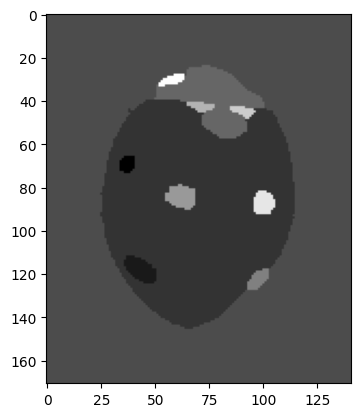

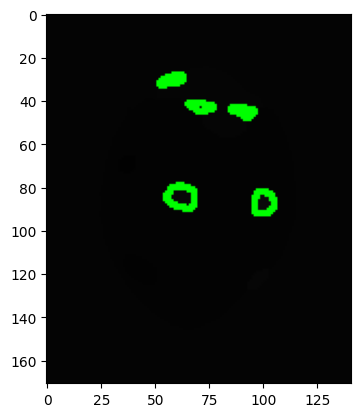

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Ouvrir l'image 'im-001_seg.png' avec la bibliothèque PIL et la convertir en niveaux de gris
image = Image.open('/content/im-001_seg.png').convert("L")

# Afficher l'image à l'aide de Matplotlib avec un color mapping en niveaux de gris
plt.imshow(image, cmap="gray")
plt.show()

# Converting the numpy image to PIL image
img_gamma = np.array(image)

# Converting PIL image to OpenCV image
img_cv = cv2.cvtColor(img_gamma, cv2.COLOR_GRAY2BGR)

# Converting the image to grayscale
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Thresholding the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(img_cv, contours, -1, (0, 255, 0), 2)

# Convert the image back to PIL image
result_image = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))

# Afficher l'image avec les contours
plt.imshow(result_image)
plt.show()

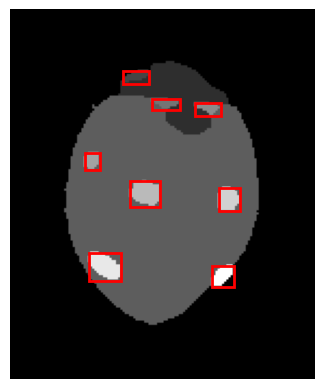

Nombre de points sur la coccinelle : 8


In [ ]:
import numpy as np
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Charger l'image
image = io.imread('im-001_seg.png')

# Segmenter l'image en régions
labeled_image = label(image)

# Masquer le fond en excluant la plus grande région
regions = regionprops(labeled_image)
background_area = 0
for region in regions:
    if region.area > background_area:
        background_area = region.area
        background_label = region.label

labeled_image[labeled_image == background_label] = 0

# Détecter les régions correspondant aux points
point_regions = []
for region in regionprops(labeled_image):
    if region.area < 200:
        point_regions.append(region.label)

# Compter le nombre de points sur la coccinelle
point_count = len(point_regions)

# Afficher l'image avec les points mis en évidence
plt.imshow(labeled_image, cmap='gray')
for region in regionprops(labeled_image):
    if region.label in point_regions:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
plt.axis('off')
plt.show()

# Afficher le nombre de points sur la coccinelle
print("Nombre de points sur la coccinelle :", point_count)

- Convertir l'image segmentée en niveaux de gris.
-Appliquer un seuillage pour obtenir les pixels correspondant aux points noirs.
-Segmenter les points noirs en régions.
-Calculer l'indice de circularité pour chaque région de points noirs.
-Compter le nombre de points noirs circulaires sur la carapace (circularité > 0.8).

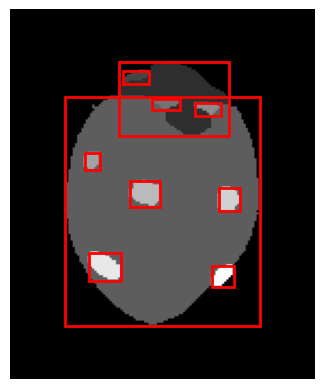

Nombre de points noirs sur la coccinelle : 10
Indices de circularité : [0.3566086494864521, 0.7264900910763802, 0.3093361332953334, 0.7430737695696615, 0.73880318999302, 1.133223860012313, 0.8844775136101862, 1.041721742784976, 0.851579164724091, 0.9128633272113803]


In [ ]:
import numpy as np
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Charger l'image de segmentation
image_seg = io.imread('im-001_seg.png')

# Segmenter l'image en régions
labeled_image = label(image_seg)

# Masquer le fond en excluant la plus grande région
regions = regionprops(labeled_image)
background_area = 0
for region in regions:
    if region.area > background_area:
        background_area = region.area
        background_label = region.label

labeled_image[labeled_image == background_label] = 0

# Détecter les régions correspondant aux points noirs
point_regions = []
for region in regionprops(labeled_image):

        point_regions.append(region.label)

# Compter le nombre de points noirs sur la coccinelle
point_count = len(point_regions)

# Calculer les indices de circularité des régions
circularity_indices = []
for region in regionprops(labeled_image):
    perimeter = region.perimeter
    area = region.area
    circularity = 4 * np.pi * area / (perimeter ** 2)
    circularity_indices.append(circularity)

# Afficher l'image avec les points noirs mis en évidence
plt.imshow(labeled_image, cmap='gray')
for region in regionprops(labeled_image):
    if region.label in point_regions:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
plt.axis('off')
plt.show()

# Afficher le nombre de points noirs sur la coccinelle
print("Nombre de points noirs sur la coccinelle :", point_count)

# Afficher les indices de circularité
print("Indices de circularité :", circularity_indices)

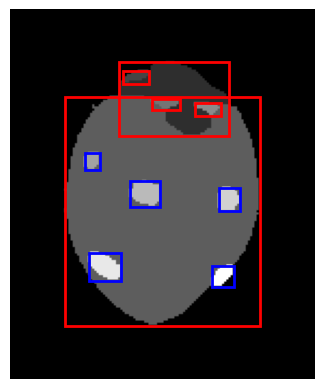

Nombre de points noirs sur la coccinelle : 10
Indices de circularité : [0.3566086494864521, 0.7264900910763802, 0.3093361332953334, 0.7430737695696615, 0.73880318999302, 1.133223860012313, 0.8844775136101862, 1.041721742784976, 0.851579164724091, 0.9128633272113803]
Points circulaires : [7, 8, 9, 10, 11]
Points non circulaires : [2, 3, 4, 5, 6]


In [ ]:
import numpy as np
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Charger l'image de segmentation
image_seg = io.imread('im-001_seg.png')

# Segmenter l'image en régions
labeled_image = label(image_seg)

# Masquer le fond en excluant la plus grande région
regions = regionprops(labeled_image)
background_area = 0
for region in regions:
    if region.area > background_area:
        background_area = region.area
        background_label = region.label

labeled_image[labeled_image == background_label] = 0

# Détecter les régions correspondant aux points noirs
point_regions = []
for region in regionprops(labeled_image):
    point_regions.append(region.label)

# Compter le nombre de points noirs sur la coccinelle
point_count = len(point_regions)

# Définir les seuils pour la classification des points noirs
circularity_threshold = 0.8

# Classer les points noirs en fonction de leur forme
circular_points = []
non_circular_points = []
for region, circularity in zip(regionprops(labeled_image), circularity_indices):
    if circularity > circularity_threshold:
        circular_points.append(region.label)
    else:
        non_circular_points.append(region.label)

# Afficher l'image avec les points noirs mis en évidence
plt.imshow(labeled_image, cmap='gray')
for region in regionprops(labeled_image):
    if region.label in circular_points:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='blue', linewidth=2)
        plt.gca().add_patch(rect)
    if region.label in non_circular_points:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
plt.axis('off')
plt.show()

# Afficher le nombre de points noirs sur la coccinelle
print("Nombre de points noirs sur la coccinelle :", point_count)

# Afficher les indices de circularité
print("Indices de circularité :", circularity_indices)

# Afficher les points classés en fonction de leur forme
print("Points circulaires :", circular_points)
print("Points non circulaires :", non_circular_points)


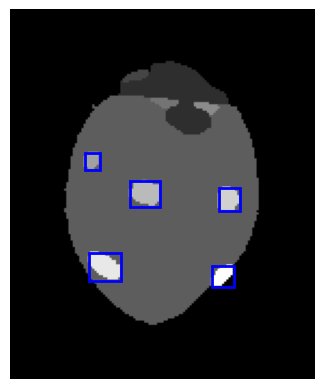

Nombre de points noirs sur la coccinelle : 10
Indices de circularité : [0.3566086494864521, 0.7264900910763802, 0.3093361332953334, 0.7430737695696615, 0.73880318999302, 1.133223860012313, 0.8844775136101862, 1.041721742784976, 0.851579164724091, 0.9128633272113803]
Points noirs circulaires sur la carapace : [7, 8, 9, 10, 11]


In [ ]:
import numpy as np
from skimage import io
from skimage.measure import label, regionprops , perimeter
import matplotlib.pyplot as plt

# Charger l'image de segmentation
image_seg = io.imread('im-001_seg.png')

# Segmenter l'image en régions
labeled_image = label(image_seg)

# Masquer le fond en excluant la plus grande région
regions = regionprops(labeled_image)
background_area = 0
for region in regions:
    if region.area > background_area:
        background_area = region.area
        background_label = region.label

labeled_image[labeled_image == background_label] = 0

# Détecter les régions correspondant aux points noirs
point_regions = []
for region in regionprops(labeled_image):
    point_regions.append(region.label)

# Compter le nombre de points noirs sur la coccinelle
point_count = len(point_regions)

# Définir le seuil pour la classification des points circulaires sur la carapace
circularity_threshold = 0.8

# Classer les points noirs en fonction de leur forme
circular_points = []
for region, circularity in zip(regionprops(labeled_image), circularity_indices):
    if circularity > circularity_threshold and region.label in point_regions:
        circular_points.append(region.label)

# Afficher l'image avec les points noirs circulaires sur la carapace mis en évidence
plt.imshow(labeled_image, cmap='gray')
for region in regionprops(labeled_image):
    if region.label in circular_points:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='blue', linewidth=2)
        plt.gca().add_patch(rect)
plt.axis('off')
plt.show()

# Afficher le nombre de points noirs sur la coccinelle
print("Nombre de points noirs sur la coccinelle :", point_count)

# Afficher les indices de circularité
print("Indices de circularité :", circularity_indices)

# Afficher les points noirs circulaires sur la carapace
print("Points noirs circulaires sur la carapace :", circular_points)

Mouhamed : compter avec les images de Paul sans fond (boucle sur toute les images) ,trouver une autre méthode pour trouver le point qui est milieu , stocker les valeurs length , réfléchir aux attendus du machine learning 

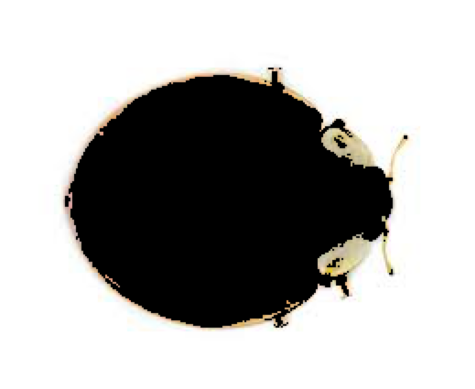

In [ ]:
import numpy as np
from PIL import Image
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Charger l'image originale
image = Image.open("/content/coccinnelle.jpeg")

# Convertir l'image en niveaux de gris
image_gray = image.convert("L")

# Convertir l'image en tableau NumPy
image_array = np.array(image_gray)

# Appliquer un seuillage pour segmenter l'image
thresh = threshold_otsu(image_array)
binary_image = image_array > thresh

# Segmenter l'image en régions
labeled_image = label(binary_image)

# Récupérer les régions correspondant à la coccinelle
coccinelle_regions = []
for region in regionprops(labeled_image):
    # Vérifier les critères de sélection des régions (aire, forme, etc.)
    if region.area > 100 and region.eccentricity < 0.8:
        coccinelle_regions.append(region)

# Créer une image masque pour la coccinelle
coccinelle_mask = np.zeros_like(image_array)
for region in coccinelle_regions:
    coccinelle_mask += region.image

# Appliquer le masque sur l'image originale
segmented_image = np.array(image)
segmented_image[coccinelle_mask == 0] = [0, 0, 0]  # Masquer le fond

# Afficher l'image segmentée
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

In [ ]:
# Convertir l'image segmentée en niveaux de gris
segmented_image_gray = Image.fromarray(segmented_image).convert("L")
segmented_image_array = np.array(segmented_image_gray)

# Appliquer un seuillage pour obtenir les points noirs
points_thresh = threshold_otsu(segmented_image_array)
points_binary = segmented_image_array < points_thresh

# Segmenter les points noirs en régions
points_labeled = label(points_binary)

# Calculer l'indice de circularité pour chaque région de points noirs
circularity_indices = []
for region in regionprops(points_labeled):
    area = region.area
    perimeter = region.perimeter
    circularity = 4 * np.pi * area / (perimeter ** 2)
    circularity_indices.append(circularity)

# Compter le nombre de points noirs circulaires sur la carapace
circular_points_count = 0
for region, circularity in zip(regionprops(points_labeled), circularity_indices):
    if circularity > 0.8:
        circular_points_count += 1

# Afficher le nombre de points noirs circulaires sur la carapace
print("Nombre de points noirs circulaires sur la carapace de la coccinelle :", circular_points_count)

Nombre de points noirs circulaires sur la carapace de la coccinelle : 0


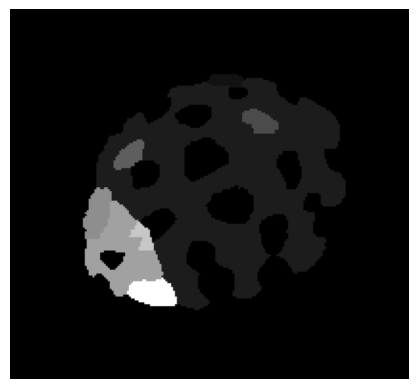

Nombre de points noirs sur la coccinelle avant mise à jour : 26
Nombre de points noirs sur la coccinelle après mise à jour : 8
Indices de circularité : [0.7107507301830891, 0.0783909978750745, 0.8290334614869912, 1.0308531674519852, 0.8544646631810225, 0.8816943243069535, 0.7693234282317424, 0.841927966624383, 0.7795346922325728, 0.8664752632641103, 0.807251334815501, 0.9312850755313422, 0.8325904592951013, 0.6746928927843855, 1.0546881124122225, 0.28227804552344254, 0.8842789388097875, 0.8166309288910425, 0.8614620574788108, 0.549609522334569, 0.9558181953890045, 0.935074070497133, 0.9083877138978923, 0.915618658433933, 0.9128633272113804, 0.7680922203450222]
Points noirs circulaires sur la carapace : [4, 5, 6, 7, 9, 11, 12, 13, 14, 16, 18, 19, 20, 22, 23, 24, 25, 26]


In [ ]:
import numpy as np
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Charger l'image de segmentation
image_seg = io.imread('/content/im-004_seg.png')

# Segmenter l'image en régions
labeled_image = label(image_seg)

# Masquer le fond en excluant la plus grande région
regions = regionprops(labeled_image)
background_area = 0
for region in regions:
    if region.area > background_area:
        background_area = region.area
        background_label = region.label

labeled_image[labeled_image == background_label] = 0

# Détecter les régions correspondant aux points noirs
point_regions = []
for region in regionprops(labeled_image):
    # Exclure les petites régions indésirables (bruit)
    if region.area > 10:
        point_regions.append(region.label)

# Compter le nombre de points noirs sur la coccinelle
point_count = len(point_regions)

# Calculer les indices de circularité des régions
circularity_indices = []
for region in regionprops(labeled_image):
    perimeter = region.perimeter
    area = region.area
    circularity = 4 * np.pi * area / (perimeter ** 2)
    circularity_indices.append(circularity)

# Définir le seuil pour la classification des points circulaires sur la carapace
circularity_threshold = 0.8

# Classer les points noirs en fonction de leur forme
circular_points = []
for region, circularity in zip(regionprops(labeled_image), circularity_indices):
    if circularity > circularity_threshold and region.label in point_regions:
        circular_points.append(region.label)
        labeled_image[labeled_image == region.label] = 0

# Afficher l'image avec les points noirs circulaires sur la carapace mis en évidence
plt.imshow(labeled_image, cmap='gray')
for region in regionprops(labeled_image):
    if region.label in circular_points:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=True, edgecolor='blue', linewidth=2)
        plt.gca().add_patch(rect)
plt.axis('off')
plt.show()

# Recompter le nombre de points noirs sur la coccinelle après avoir défini les points circulaires comme noirs
point_regions_updated = []
for region in regionprops(labeled_image):
    if region.area > 10:
        point_regions_updated.append(region.label)
point_count_updated = len(point_regions_updated)

# Afficher le nombre de points noirs sur la coccinelle
print("Nombre de points noirs sur la coccinelle avant mise à jour :", point_count)
print("Nombre de points noirs sur la coccinelle après mise à jour :", point_count_updated)

# Afficher les indices de circularité
print("Indices de circularité :", circularity_indices)

# Afficher les points noirs circulaires sur la carapace
print("Points noirs circulaires sur la carapace :", circular_points)

In [ ]:
import numpy as np
from skimage import measure, io

# charger l'image segmentée
image_seg = io.imread("/content/im-006_seg.png")

# extraire les régions de la segmentation
regions = measure.regionprops(image_seg)

# initialiser le compteur de points noirs
count_points = 0

# parcourir chaque région pour déterminer si elle correspond à un point
for props in regions:
    # extraire les propriétés géométriques de la région
    area = props.area
    perimeter = props.perimeter

    # calculer l'indice de circularité de la région
    circularity = 4 * np.pi * area / (perimeter ** 2)

    # si l'indice de circularité est proche de 1 (c-à-d un cercle) et que l'aire est supérieure à un seuil donné, on considère qu'il s'agit d'un point
    if circularity >= 0.8 and area > 10:
        count_points += 1

# afficher le nombre total de points trouvés
print("Nombre de points : ", count_points)

Nombre de points :  3


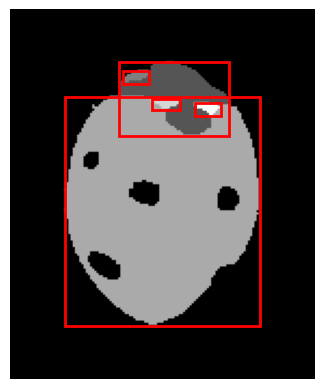

Nombre de points noirs sur la coccinelle : 10
Indices de circularité : [0.3566086494864521, 0.7264900910763802, 0.3093361332953334, 0.7430737695696615, 0.73880318999302, 1.133223860012313, 0.8844775136101862, 1.041721742784976, 0.851579164724091, 0.9128633272113803]
Points noirs circulaires sur la carapace : [7, 8, 9, 10, 11]


In [ ]:
import numpy as np
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Charger l'image de segmentation
image_seg = io.imread('im-001_seg.png')

# Segmenter l'image en régions
labeled_image = label(image_seg)

# Masquer le fond en excluant la plus grande région
regions = regionprops(labeled_image)
background_area = 0
for region in regions:
    if region.area > background_area:
        background_area = region.area
        background_label = region.label

labeled_image[labeled_image == background_label] = 0

# Détecter les régions correspondant aux points noirs
point_regions = []
for region in regionprops(labeled_image):
    point_regions.append(region.label)

# Compter le nombre de points noirs sur la coccinelle
point_count = len(point_regions)

# Calculer les indices de circularité des régions
circularity_indices = []
for region in regionprops(labeled_image):
    perimeter = region.perimeter
    area = region.area
    circularity = 4 * np.pi * area / (perimeter ** 2)
    circularity_indices.append(circularity)

# Définir le seuil pour la classification des points circulaires sur la carapace
circularity_threshold = 0.8

# Classer les points noirs en fonction de leur forme
circular_points = []
for region, circularity in zip(regionprops(labeled_image), circularity_indices):
    if circularity > circularity_threshold and region.label in point_regions:
        circular_points.append(region.label)

# Définir les points circulaires sur la carapace comme des points noirs
for region in regionprops(labeled_image):
    if region.label in circular_points:
        labeled_image[labeled_image == region.label] = 0

# Afficher l'image avec les points noirs mis en évidence
plt.imshow(labeled_image, cmap='gray')
for region in regionprops(labeled_image):
    if region.label in point_regions:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
plt.axis('off')
plt.show()

# Afficher le nombre de points noirs sur la coccinelle
print("Nombre de points noirs sur la coccinelle :", point_count)

# Afficher les indices de circularité
print("Indices de circularité :", circularity_indices)

# Afficher les points noirs circulaires sur la carapace
print("Points noirs circulaires sur la carapace :", circular_points)


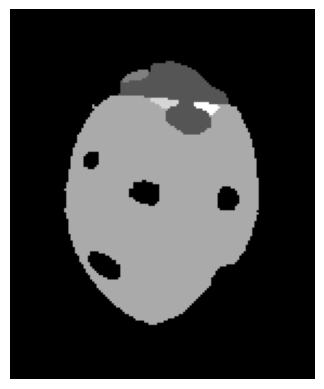

Nombre de points noirs sur la coccinelle avant mise à jour : 10
Nombre de points noirs sur la coccinelle après mise à jour : 5
Indices de circularité : [0.3566086494864521, 0.7264900910763802, 0.3093361332953334, 0.7430737695696615, 0.73880318999302, 1.133223860012313, 0.8844775136101862, 1.041721742784976, 0.851579164724091, 0.9128633272113803]
Points noirs circulaires sur la carapace : [7, 8, 9, 10, 11]


In [ ]:
import numpy as np
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Charger l'image de segmentation
image_seg = io.imread('im-001_seg.png')

# Segmenter l'image en régions
labeled_image = label(image_seg)

# Masquer le fond en excluant la plus grande région
regions = regionprops(labeled_image)
background_area = 0
for region in regions:
    if region.area > background_area:
        background_area = region.area
        background_label = region.label

labeled_image[labeled_image == background_label] = 0

# Détecter les régions correspondant aux points noirs
point_regions = []
for region in regionprops(labeled_image):
    point_regions.append(region.label)

# Compter le nombre de points noirs sur la coccinelle
point_count = len(point_regions)

# Calculer les indices de circularité des régions
circularity_indices = []
for region in regionprops(labeled_image):
    perimeter = region.perimeter
    area = region.area
    circularity = 4 * np.pi * area / (perimeter ** 2)
    circularity_indices.append(circularity)

# Définir le seuil pour la classification des points circulaires sur la carapace
circularity_threshold = 0.8

# Classer les points noirs en fonction de leur forme
circular_points = []
for region, circularity in zip(regionprops(labeled_image), circularity_indices):
    if circularity > circularity_threshold and region.label in point_regions:
        circular_points.append(region.label)
        labeled_image[labeled_image == region.label] = 0

# Afficher l'image avec les points noirs circulaires sur la carapace mis en évidence
plt.imshow(labeled_image, cmap='gray')
for region in regionprops(labeled_image):
    if region.label in circular_points:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='blue', linewidth=2)
        plt.gca().add_patch(rect)
plt.axis('off')
plt.show()

# Recompter le nombre de points noirs sur la coccinelle après avoir défini les points circulaires comme noirs
point_regions_updated = []
for region in regionprops(labeled_image):
    point_regions_updated.append(region.label)
point_count_updated = len(point_regions_updated)

# Afficher le nombre de points noirs sur la coccinelle
print("Nombre de points noirs sur la coccinelle avant mise à jour :", point_count)
print("Nombre de points noirs sur la coccinelle après mise à jour :", point_count_updated)

# Afficher les indices de circularité
print("Indices de circularité :", circularity_indices)

# Afficher les points noirs circulaires sur la carapace
print("Points noirs circulaires sur la carapace :", circular_points)


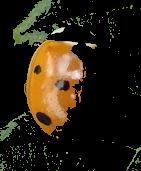

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Charger l'image segmentée
image_segmented = cv2.imread("/content/im-001_im.png")

# Convertir l'image en niveaux de gris
image_gray = cv2.cvtColor(image_segmented, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage adaptatif pour binariser l'image
_, binary_image = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Trouver les contours des objets binaires
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer un masque pour les contours détectés
mask = np.zeros_like(image_segmented)

# Dessiner les contours sur le masque
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Appliquer le masque à l'image segmentée
image_without_background = cv2.bitwise_and(image_segmented, mask)

# Afficher l'image sans arrière-plan
cv2_imshow(image_without_background)

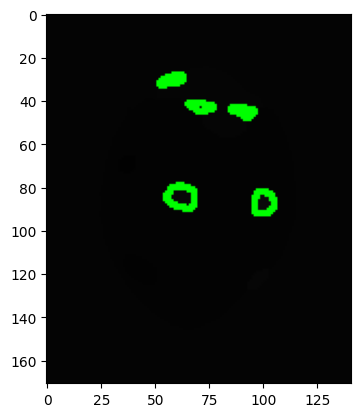

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Ouvrir l'image 'im-001_seg.png' avec la bibliothèque PIL et la convertir en niveaux de gris
image = Image.open('/content/im-001_seg.png').convert("L")

# Converting the numpy image to PIL image
img_gamma = np.array(image)

# Converting PIL image to OpenCV image
img_cv = cv2.cvtColor(img_gamma, cv2.COLOR_GRAY2BGR)

# Converting the image to grayscale
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Thresholding the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Trouver les contours de l'image seuillée
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
image_with_contours = cv2.drawContours(img_cv, contours, -1, (0, 255, 0), 2)

# Afficher l'image avec les contours détectés
plt.imshow(image_with_contours)
plt.show()

In [ ]:
from PIL import Image 
import requests 
import matplotlib.pyplot as plt 
import numpy as np 
from io import BytesIO
import cv2


#Converting PIL image to OpenCV image 

im_cv = cv2.cvtColor(np.array(segmented_image_gamma), cv2.COLOR_RGB2BGR)

#Converting the image to grayscale 

image = cv2.cvtcolor(img_cv , cv2.COLOR_BGR2RGB)
R , G , B = cv2.split(image)


-, thres = cv2.threshold(B,100,256,cv2.THRESH_binary +cv2.THRESH_OTSU)
contour = cv2.Canny(G, 5, 5)
num_contours = len(contour)
print("Nombre de contour: ", num_contours)
plt.subplot(331), plt.imshow(image), plt.title("original"), plt.axis("off")
plt.subplot(332), plt.imshow(R, cmap='gray'), plt.title("R"), plt.axis("off")
plt.subplot(333), plt.imshow(G, cmap='gray'), plt.title("G"), plt.axis("off")
plt.subplot(334), plt.imshow(B, cmap='gray'), plt.title("B"), plt.axis("off")
plt.subplot(335), plt.imshow(thres, cmap='gray'), plt.title("otsu"), plt.axis("off")
plt.subplot(336), plt.imshow(contour, cmap='gray'), plt.title("contour"), plt.axis("off")

plt.show()

SyntaxError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


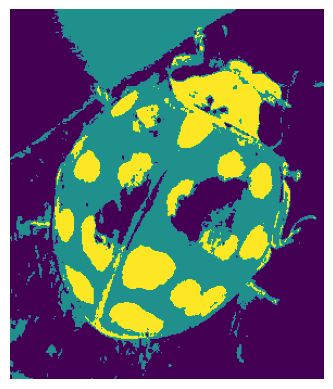

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the segmented image
image_segmented = cv2.imread("/content/im-003_im.png")

# Reshape the image to a 2D array of pixels
pixels = image_segmented.reshape(-1, 3)

# Perform K-means clustering
num_clusters = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

# Get the labels assigned to each pixel
labels = kmeans.labels_

# Reshape the labels back into the original image shape
labels_image = labels.reshape(image_segmented.shape[:2])

# Display the clustered image
plt.imshow(labels_image, cmap='viridis')
plt.axis('off')
plt.show()